In [1]:
import pandas as pd

In [2]:
from google.colab import drive
import os
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/DATASETS/CRIMENES/'
df= pd.read_csv('Crime_Data_from_2020_to_Present.csv',sep=',')


/content/gdrive/MyDrive/Colab Notebooks/DATASETS/CRIMENES


In [4]:
df.shape

(829778, 28)

In [5]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


Hipótesis:
Dado que el conjunto de datos proporciona información detallada sobre crímenes, fechas y ubicaciones, podríamos hipotetizar que existe una relación entre ciertos tipos de crímenes y áreas específicas. Podríamos también explorar patrones temporales, como la frecuencia de ciertos crímenes en días particulares. Además, podríamos investigar si hay correlaciones entre la hora del día y el tipo de crimen. Esto podría ser útil para las fuerzas del orden y las autoridades para tomar medidas preventivas y mejorar la seguridad en áreas específicas.

Preguntas:

¿Cuál es la fecha del reporte más reciente en el conjunto de datos?
¿En qué área (AREA NAME) se ha reportado el mayor número de crímenes?
¿Cuál es el tipo de crimen (Crm Cd Desc) más común en el conjunto de datos?
¿Cuántos crímenes fueron reportados en el área "Southwest"?
¿Cuántos crímenes fueron clasificados como "BATTERY - SIMPLE ASSAULT"?
¿Cuántos crímenes ocurrieron en la fecha de ocurrencia "01/01/2020"?
¿Cuál es la ubicación (LOCATION) del crimen con el código "740.0"?
¿Cuántos crímenes fueron reportados en la categoría "SEX OFFENDER REGISTRANT OUT OF COMPLIANCE"?
¿En cuántos casos se realizaron arrestos de adultos (Status Desc: "Adult Arrest")?
¿Cuántos crímenes involucran múltiples códigos criminales (Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4)?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829778 entries, 0 to 829777
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           829778 non-null  int64  
 1   Date Rptd       829778 non-null  object 
 2   DATE OCC        829778 non-null  object 
 3   TIME OCC        829778 non-null  int64  
 4   AREA            829778 non-null  int64  
 5   AREA NAME       829778 non-null  object 
 6   Rpt Dist No     829778 non-null  int64  
 7   Part 1-2        829778 non-null  int64  
 8   Crm Cd          829778 non-null  int64  
 9   Crm Cd Desc     829778 non-null  object 
 10  Mocodes         714922 non-null  object 
 11  Vict Age        829778 non-null  int64  
 12  Vict Sex        720479 non-null  object 
 13  Vict Descent    720471 non-null  object 
 14  Premis Cd       829768 non-null  float64
 15  Premis Desc     829286 non-null  object 
 16  Weapon Used Cd  289319 non-null  float64
 17  Weapon Des

Los datos contienen más de 600.000 incidentes delictivos, con 28 atributos. Si bien lse clasificaron muchas columnas como int o float,  solo la edad de la víctima (Vict Age) es verdaderamente numérica. La mayoría de los demás son códigos (que contienen Cd en los nombres de sus columnas) y, en su lugar, deben tratarse como cadenas.

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Se calcula la frecuencia de los crimenes

In [16]:
crime_freq = df["Crm Cd Desc"].value_counts()

Se Cambian los formatos de DATE RPTD y DATE OCC para poder traer el max y el min y calcular la duracion

In [17]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

In [18]:
# Duracion
duration = (df["DATE OCC"].max() - df["DATE OCC"].min()).days

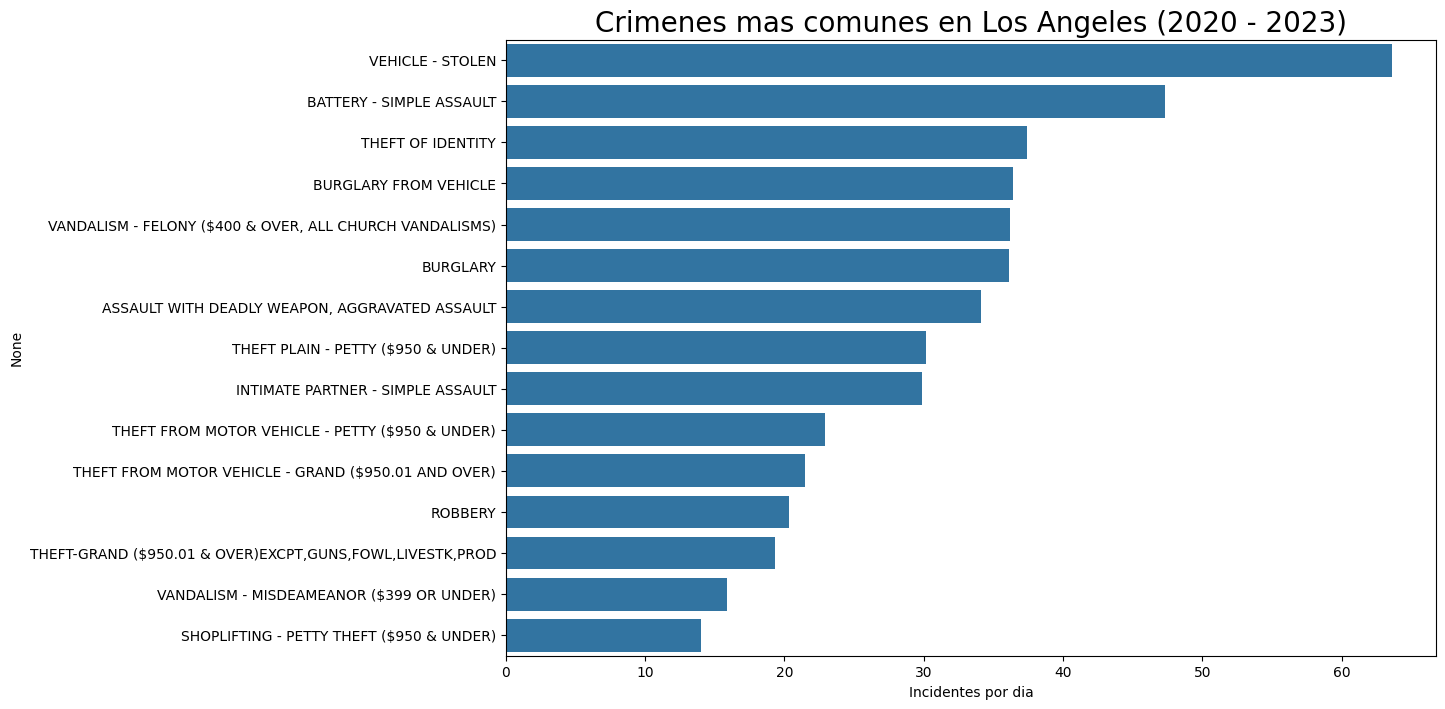

In [19]:
plt.rcParams["figure.figsize"] = (12, 8) # Escala por defecto
plt.rcParams['axes.titlesize'] = 20
sns.barplot(x = crime_freq.values[:15]/duration, y = crime_freq.index[:15])
plt.title("Crimenes mas comunes en Los Angeles (2020 - 2023)")
plt.xlabel("Incidentes por dia");

Se calculan los crimenes mas comunes o populares para ver cuales son los mas preponderantes


In [21]:
crime_freq_df = crime_freq.to_frame().reset_index()
crime_freq_df.columns = ["Crm", "Count"]
crime_freq_df['Perc'] = crime_freq_df.Count/crime_freq_df.Count.sum()*100
crime_freq_df['CumPerc'] = crime_freq_df["Perc"].cumsum()

In [22]:
crime_freq_df[crime_freq_df.CumPerc < 70]

,Crm,Count,Perc,CumPerc
0,VEHICLE - STOLEN,88892,10.712745,10.712745
1,BATTERY - SIMPLE ASSAULT,66149,7.971891,18.684636
2,THEFT OF IDENTITY,52321,6.305421,24.990058
3,BURGLARY FROM VEHICLE,50941,6.139112,31.129169
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",50556,6.092714,37.221883
5,BURGLARY,50535,6.090183,43.312067
6,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",47711,5.749851,49.061918
7,THEFT PLAIN - PETTY ($950 & UNDER),42158,5.080636,54.142554
8,INTIMATE PARTNER - SIMPLE ASSAULT,41776,5.034600,59.177153
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),32026,3.859587,63.036740


In [23]:
# Crimenes SEMANALES
df['SEMANAL'] = pd.DatetimeIndex(df["DATE OCC"]).to_period('W').to_timestamp()
# Crimenes MENSUALES
df['MENSUAL'] = pd.DatetimeIndex(df["DATE OCC"]).to_period('M').to_timestamp()

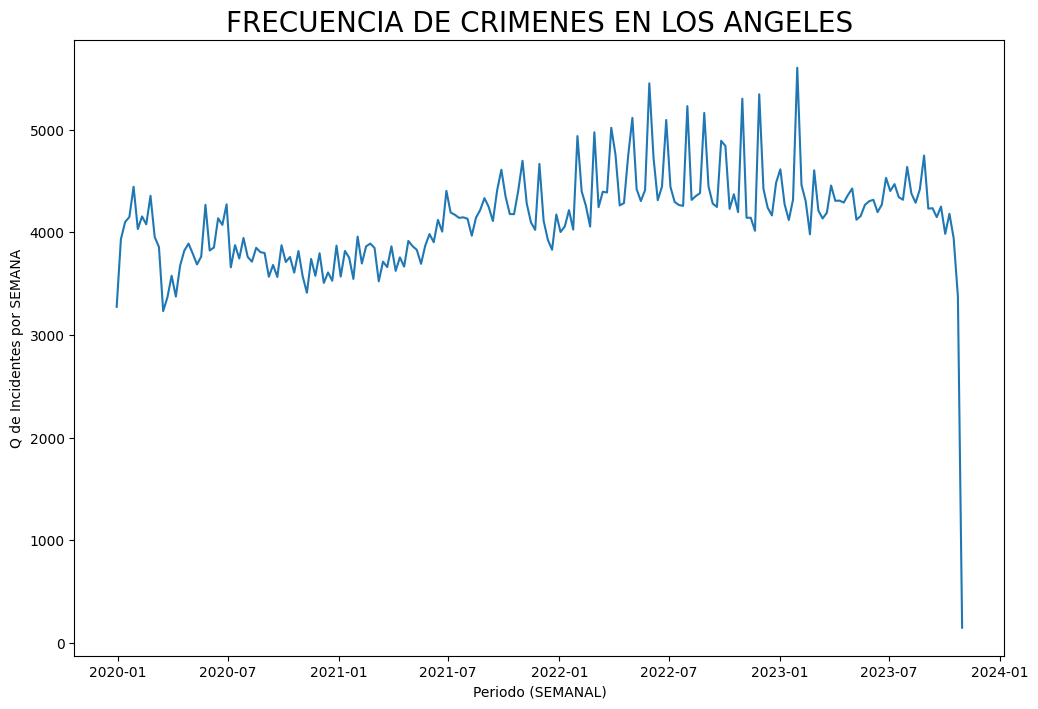

In [24]:
crime_time = df.groupby("SEMANAL").count().reset_index()[["SEMANAL", "DR_NO"]]

plt.figure(figsize=(12,8))
sns.lineplot(x=crime_time.SEMANAL, y=crime_time.DR_NO)
plt.title("FRECUENCIA DE CRIMENES EN LOS ANGELES")
plt.ylabel("Q de Incidentes por SEMANA")
plt.xlabel("Periodo (SEMANAL)");

La caída en la última semana de 2023 probablemente se deba a datos no actualizados,es decir, la semana del 27 de febrero de 2023, pero estos datos se actualizaron por última vez el 1 de marzo de 2023. En comparación con principios de 2020, parece que se producirán un poco más de delitos a finales de 2022.

In [25]:
# TOP 10 CRIMENES SEMANALES
top_crime = crime_freq_df.iloc[:10,0]
top_crime_time = df[df['Crm Cd Desc'].isin(top_crime)]

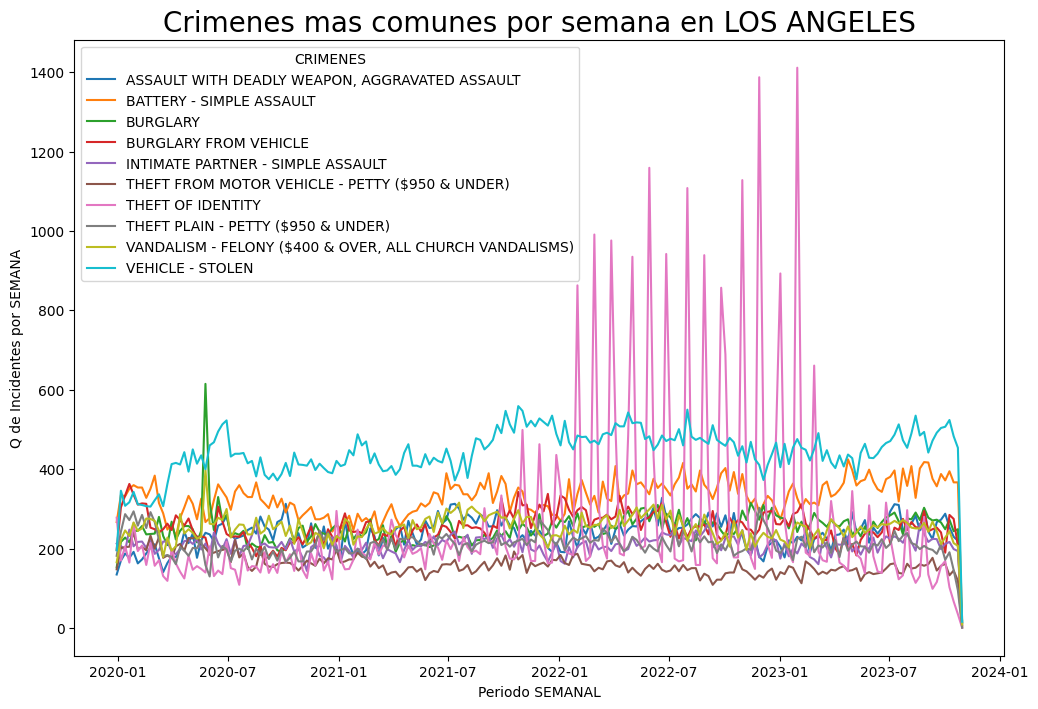

In [26]:
top_crime_time_week = top_crime_time.groupby(["SEMANAL", "Crm Cd Desc"]).count().reset_index()[["SEMANAL", "Crm Cd Desc", "DR_NO"]]

plt.figure(figsize=(12,8))
sns.lineplot(data=top_crime_time_week, x="SEMANAL", y = "DR_NO", hue = 'Crm Cd Desc')
plt.title("Crimenes mas comunes por semana en LOS ANGELES")
plt.ylabel("Q de Incidentes por SEMANA")
plt.xlabel("Periodo SEMANAL")
plt.legend(title = "CRIMENES");

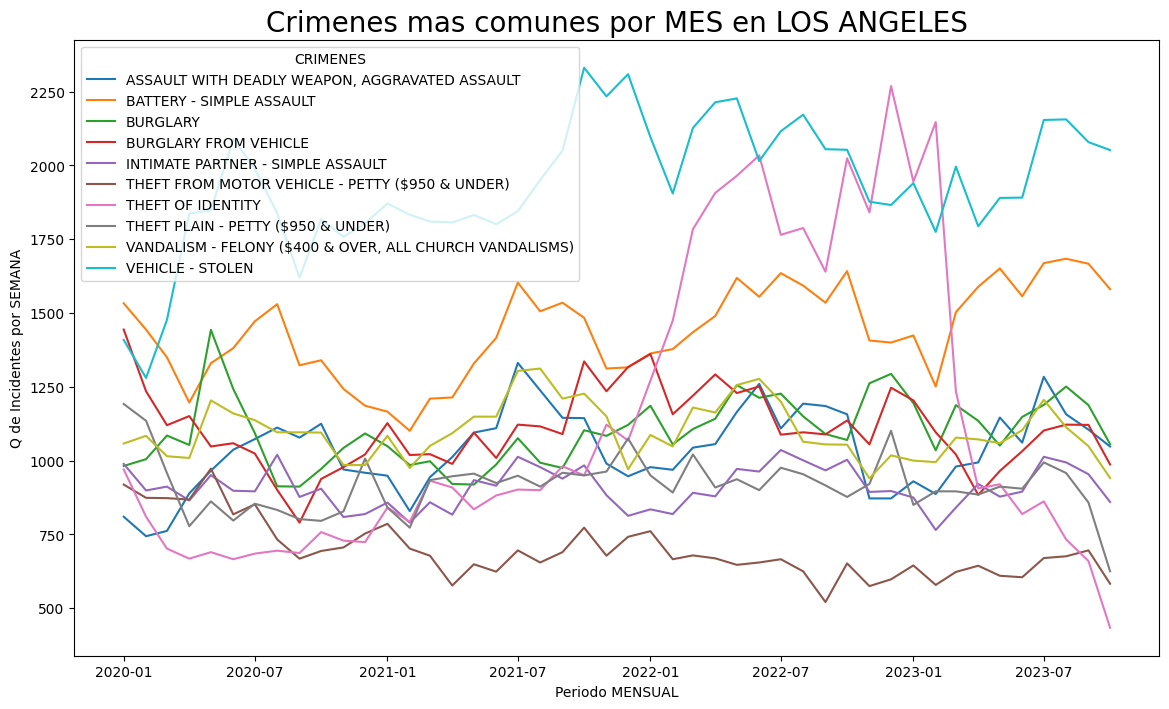

In [28]:
top_crime_time_month = top_crime_time.groupby(["MENSUAL", "Crm Cd Desc"]).count().reset_index()[["MENSUAL", "Crm Cd Desc", "DR_NO"]]

plt.figure(figsize=(14,8))
sns.lineplot(data=top_crime_time_month, x="MENSUAL", y = "DR_NO", hue = 'Crm Cd Desc')
plt.title("Crimenes mas comunes por MES en LOS ANGELES")
plt.ylabel("Q de Incidentes por SEMANA")
plt.xlabel("Periodo MENSUAL")
plt.legend(title = "CRIMENES");

El robo de vehiculos como se ve en el grafico, es el mas comun de los crimenes en los Angeles, aunque tambien el robo de identidad tubo un auge en el año 2023

In [29]:
df['TimeSlot'] = pd.cut(x=df["TIME OCC"],
    bins=[0, 159, 359, 559, 759, 959, 1159, 1359, 1559, 1759, 1959, 2159, 2359],
    labels=['0-2','2-4','4-6','6-8','8-10','10-12','12-14', '14-16', '16-18','18-20','20-22','22-24'])

<ipython-input-30-cb40ff25aa67>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  crime_hour_table = crime_hour.pivot("TimeSlot", 'MENSUAL', 'DR_NO')


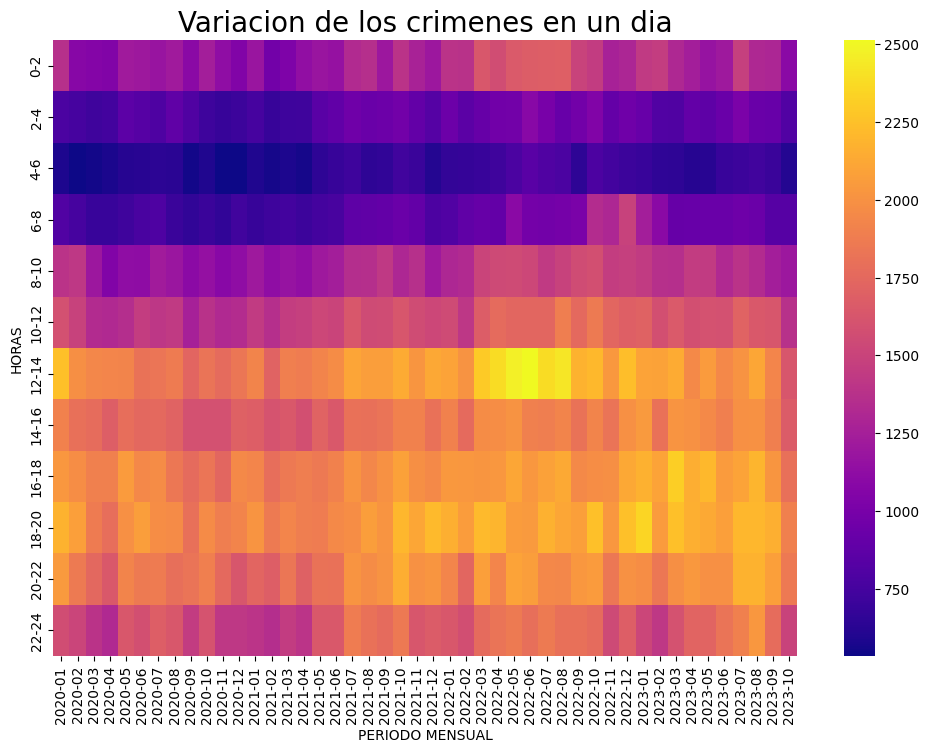

In [30]:
crime_hour = df.groupby(['TimeSlot', 'MENSUAL'])['DR_NO'].size().reset_index()
crime_hour_table = crime_hour.pivot("TimeSlot", 'MENSUAL', 'DR_NO')
sns.heatmap(crime_hour_table, cmap = "plasma")
plt.title("Variacion de los crimenes en un dia")
plt.xticks(np.arange(0.5, 46, 1),labels = crime_hour_table.columns.to_period('M'))
plt.xlabel("PERIODO MENSUAL")
plt.ylabel("HORAS");

Es menos probable que los delitos ocurran entre las 4 y las 6 a.m. de la mañana, y es más probable que ocurran entre las 12 y las 14 p.m. y las 18 a 20 p.m.

Cuanto tardan las personas en reportar un crimen?

In [31]:
df['demora'] = (df['Date Rptd'] - df['DATE OCC']).dt.days

In [32]:
df['delay_cat'] = pd.cut(
    x=df["demora"],
    bins=[-1, 0, 1, 2, 7, 30, 365, np.inf],
    labels=["mismo dia","1 dia","2 dias",'3-7 dias','8-30 dadiasys','1 mes-1 año','Mas de un año'])

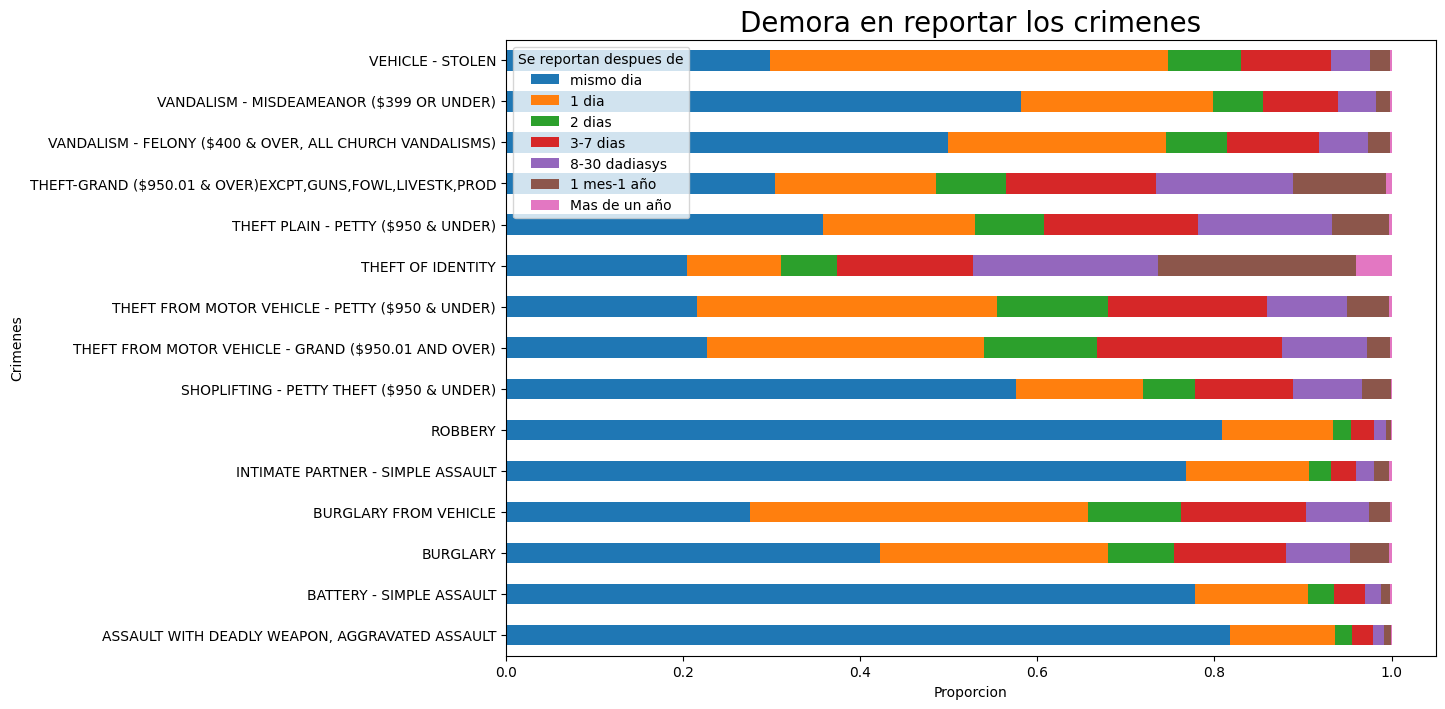

In [33]:
top_crime = crime_freq_df.iloc[:15,0]
top_crime_delay = df[df['Crm Cd Desc'].isin(top_crime)].groupby("Crm Cd Desc")['delay_cat'].value_counts(normalize=True).unstack()

top_crime_delay.plot.barh(stacked = True)
plt.title('Demora en reportar los crimenes')
plt.ylabel('Crimenes')
plt.xlabel('Proporcion')
plt.legend(title = "Se reportan despues de");

La mayoría de los delitos comunes se denuncian dentro del día o al día siguiente al incidente. Se reportan muy  asaltos, vandalismo, robo y robo de vehículos. Sin embargo, los robos y hurtos generalmente se denuncian más tarde, lo que puede reflejar la naturaleza de esos delitos y que las víctimas tal vez no se den cuenta de ellos de inmediato. En particular, el robo de identidad, el delito cada vez más popular, también es el que sufre el mayor retraso en su denuncia.

LOCACION DE LOS CRIMENES

In [34]:
import folium
from folium.plugins import HeatMap

In [35]:
# Se excluyen los lugares sin lat y long
valid_lat_lon = df[(df['LAT'] != 0) & (df['LON'] != 0)]
# se toman como muestra el 0.1 % de todos los crimenes
sample_df = valid_lat_lon.sample(int(0.001 * len(valid_lat_lon)))
lat_lon_pairs = list(zip(list(sample_df.LAT), list(sample_df.LON)))

In [36]:
map_la = folium.Map(location = [34.0522, -118.2437], zoom_start = 10)
HeatMap(lat_lon_pairs).add_to(map_la)
map_la

IMPORTANDO PLOTY EXPRESS PARA UN NUEVO GRAFICO DE  LAT Y LONG

In [37]:
import plotly.express as px

In [38]:
valid_lat_lon['area_count'] = valid_lat_lon.groupby('AREA')['DR_NO'].transform('count')
fig = px.scatter(data_frame = valid_lat_lon.sample(int(0.01 * len(valid_lat_lon))),
                 x='LON', y='LAT', color_continuous_scale = "viridis",
                 color = "area_count", hover_data = ["AREA NAME"],
                 labels={"LAT":"Latitud", "LON":"Longitud", "area_count":"Incidentes"},
                 title = "Numero de incidentes por AREA")
fig.update_layout(width = 600, height = 700, title={'x': 0.5, 'xanchor': 'center'})
fig.update_yaxes(scaleanchor="x", scaleratio=1,)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=0.5,
                                        color='aliceblue')),
                  selector=dict(mode='markers'))
fig.show()

<ipython-input-38-9f4c60558d11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_lat_lon['area_count'] = valid_lat_lon.groupby('AREA')['DR_NO'].transform('count')


IMPORTAMOS PARA HACER NUBES DE PALABRAS

In [39]:
from wordcloud import WordCloud

In [40]:
premis_occurred = df['Premis Desc'].value_counts().head(200)
# CREAR DICCIONARIO
premis_dict = {}
for i in range(len(premis_occurred)):
    a = premis_occurred.index[i]
    x = premis_occurred.values[i]
    premis_dict[a] = x

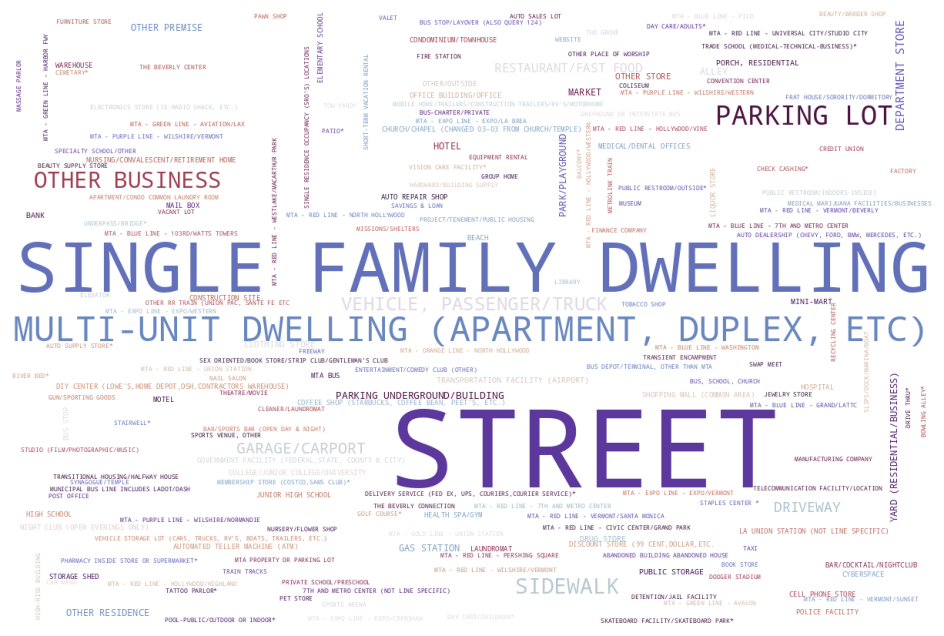

In [41]:
nube = WordCloud(width=1200,
        height=800,
        random_state=15,
        background_color="white",
        colormap="twilight_shifted",
        collocations=False).generate_from_frequencies(premis_dict)

# MOSTRAR LA IMAGEN GENERADA:
plt.imshow(nube)
plt.axis("off")
plt.show()

CARACTERISTICAS DE LAS VICTIMAS:

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

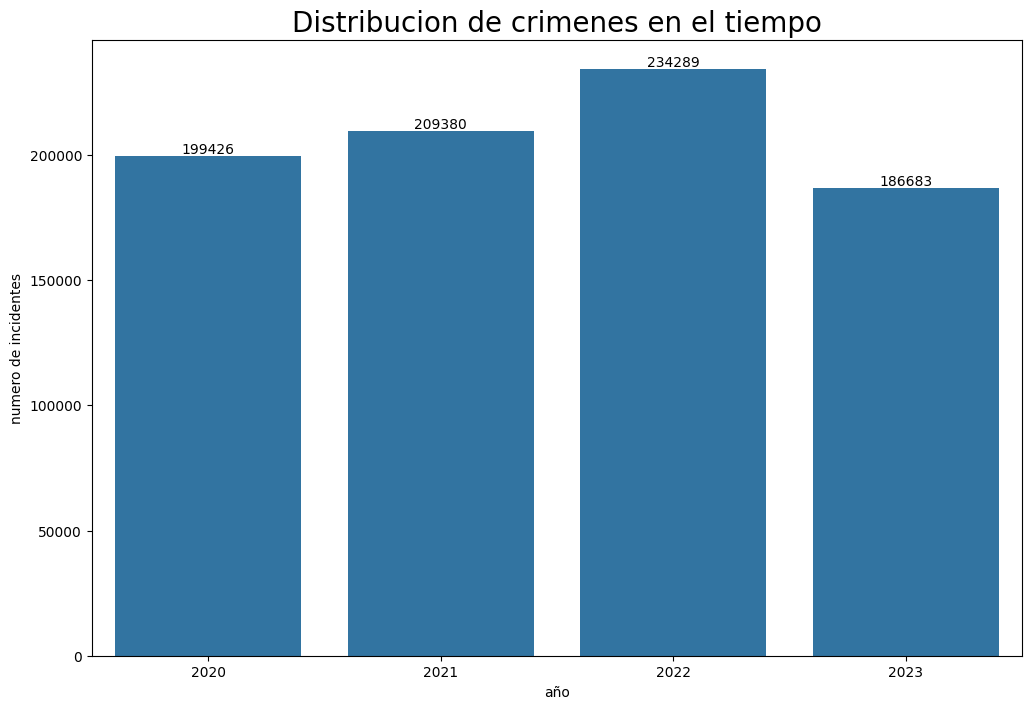

In [45]:
ax=sns.countplot(x=df['DATE OCC'].dt.year)
for i in ax.containers:
  ax.bar_label(i)
  plt.title('Distribucion de crimenes en el tiempo')
  plt.xlabel('año')
  plt.ylabel('numero de incidentes')
  plt.show()

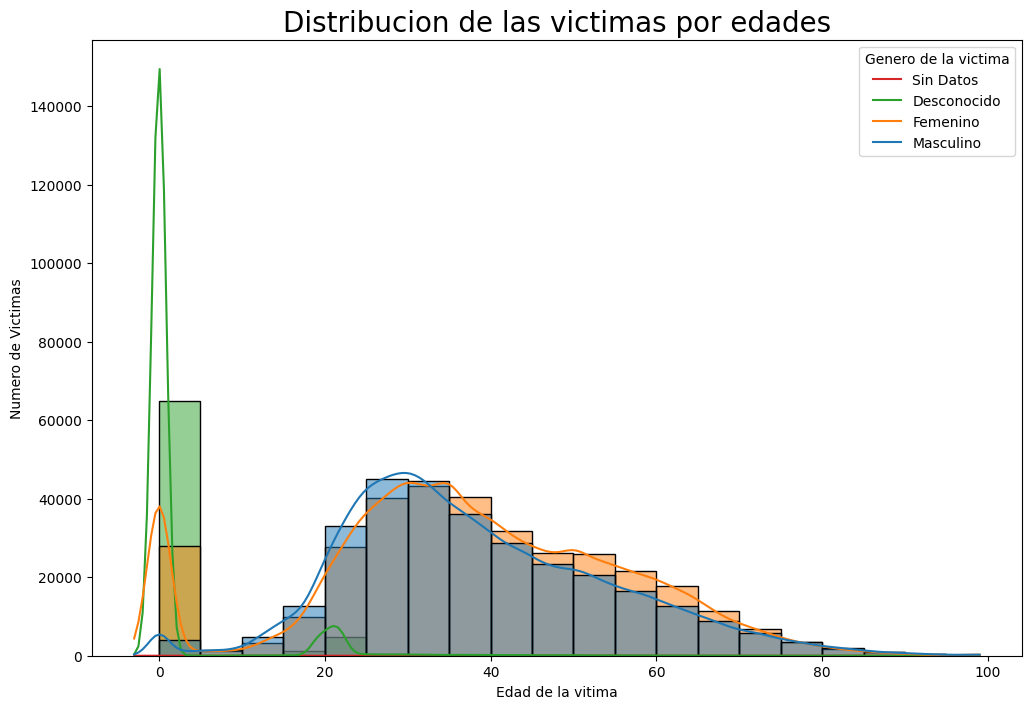

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data = df, x = 'Vict Age', hue = 'Vict Sex', bins = np.arange(0,100,5), kde = True)
plt.title("Distribucion de las victimas por edades")
plt.xlabel("Edad de la vitima")
plt.ylabel('Numero de Victimas')
plt.legend(['Sin Datos', 'Desconocido', 'Femenino', 'Masculino'], title = "Genero de la victima");

Puede ser que la cantidad de personas que figuran como 0 en edad, sea un error de la base o que sea un numero por defecto que se pone cuando la persona no quiere decir su edad, con lo cual se excluyen los 0 para "limpiar la muestra"

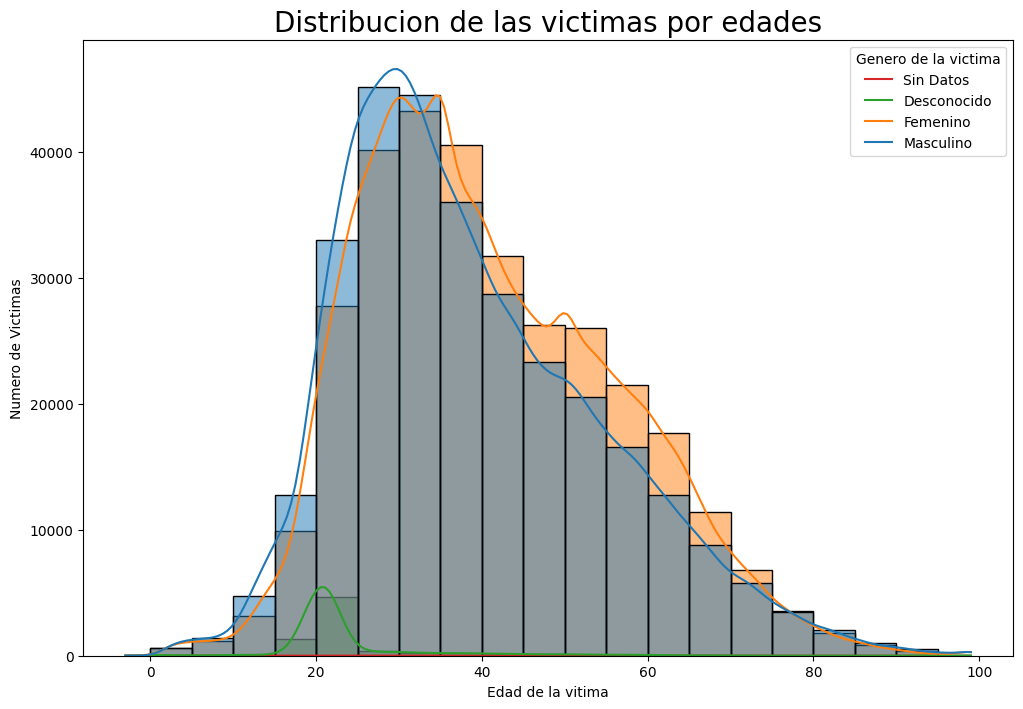

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data = df[df['Vict Age'] != 0], x = 'Vict Age', hue = 'Vict Sex', bins = np.arange(0,100,5), kde = True)
plt.title("Distribucion de las victimas por edades")
plt.xlabel("Edad de la vitima")
plt.ylabel('Numero de Victimas')
plt.legend(['Sin Datos', 'Desconocido', 'Femenino', 'Masculino'], title = "Genero de la victima");

La mayoría de las víctimas tienen entre 20 y 40 años, pero es posible que esto no refleje con precisión la vulnerabilidad, ya que simplemente puede haber más personas de esta edad en la ciudad. Si asumimos una dinámica poblacional estable en esta ciudad (la diferencia entre grupos de edad no es muy grande), estos datos pueden apuntar a los adultos como las principales víctimas. Sin embargo, también debemos considerar que los delitos que involucran a niños y ancianos tienden a no denunciarse.

POR ULTIMO, MOSTRAMOS A QUE PERSONAS SE ATACAN MAS POR GRUPO ETNICO

In [ ]:
df['Ethnic'] = df['Vict Descent'].transform(lambda x:
                                "Hispano" if x=="H"
                                else "Caucasico" if x=="W"
                                else "Negro" if x == "B"
                                else "Desconocido" if x=="X"
                                else "Otros" if x=="O"
                                else "Islas del pacifico" if x in ["G", "I", "P", "S", "U"]
                                else "Asiaticos")

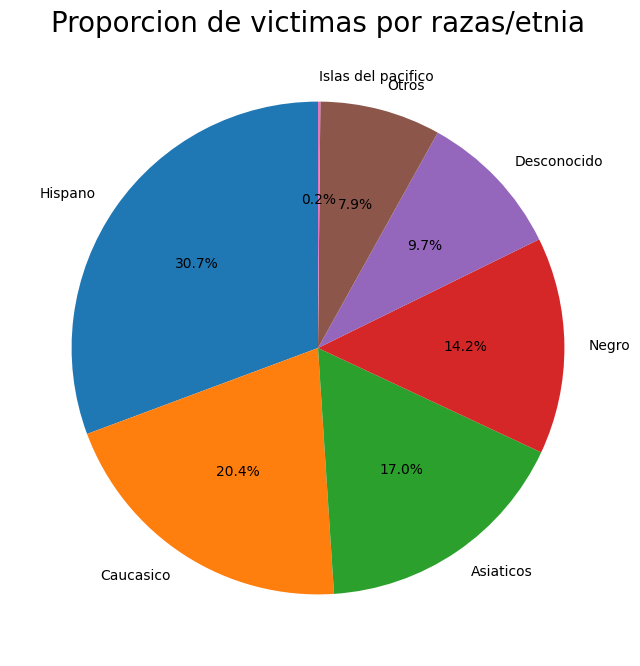

In [ ]:
df['Ethnic'].value_counts().plot(kind = "pie", autopct='%1.1f%%', startangle=90)
plt.title("Proporcion de victimas por razas/etnia")
plt.axis("off");

A partir del número de víctimas, podemos llegar a la conclusión de que los hispanos son los más atacados, seguidos por los caucásicos, luego los asiáticos y luego los negros. Sin embargo, para comprobar la vulnerabilidad, debemos considerar la distribución de razas en la ciudad.

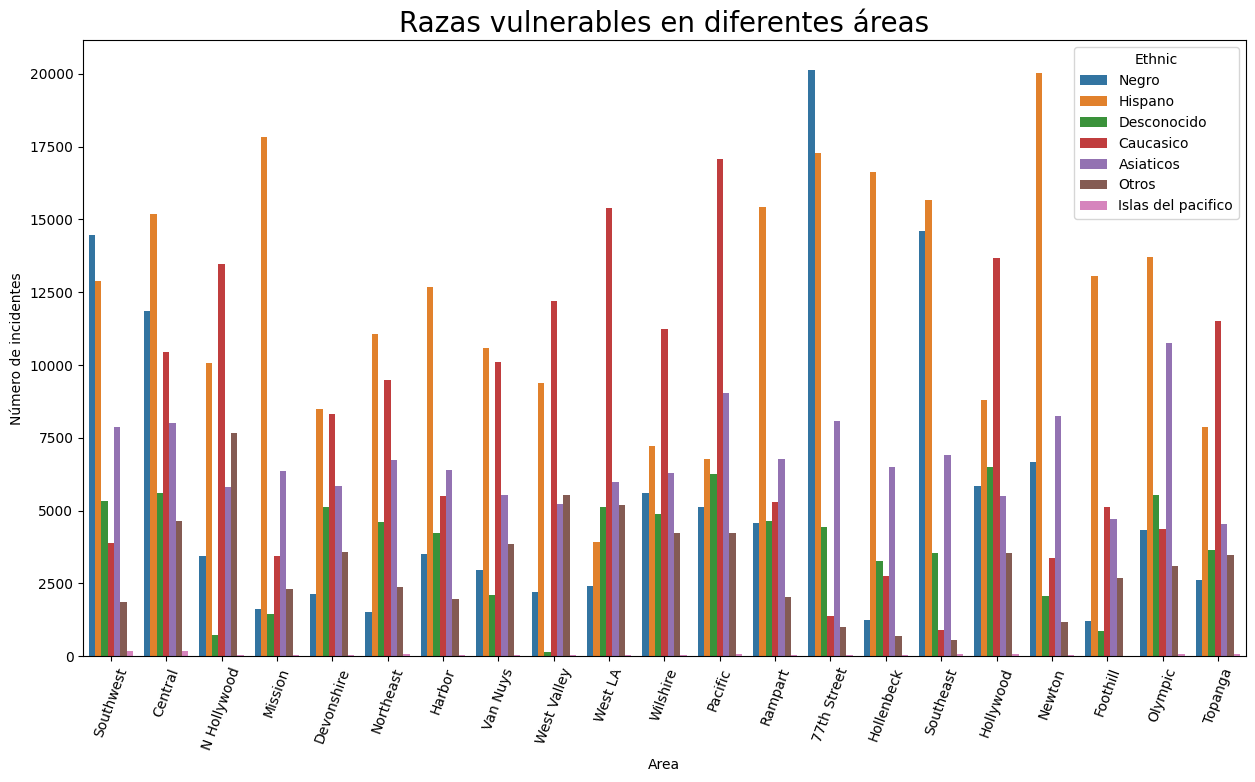

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = "AREA NAME", hue = "Ethnic")
plt.xticks(rotation=70)
plt.title("Razas vulnerables en diferentes áreas")
plt.ylabel("Número de incidentes")
plt.xlabel("Area");

A partir de este grafico podemos observar como se concentran en las distintas ciudades el numero de victimas respecto a su raza. Tomando como ejemplo la raza negra, vemos que en Southwest y 77th Street podriamos tener un problema de racismo o preponderancia a ataques a ese grupo étnico

Para la fase de modelado predictivo de nuestro proyecto, identifiqué un conjunto de características clave de nuestro conjunto de datos que probablemente influyan en el resultado de los casos penales. Las características seleccionadas son:

AREA: representa el área geográfica donde ocurrió el delito, lo que podría ser crucial para comprender los patrones de delincuencia regionales.

CRM CODE: El código específico asignado al tipo de delito cometido. Los diferentes tipos de delitos pueden tener diferentes tasas de resolución.

VICT SEX: El género de la víctima, que puede correlacionarse con ciertos tipos de delitos o sus tasas de resolución.

Vict Descent: el origen de la víctima, lo que potencialmente proporciona información sobre si ciertos grupos demográficos tienen más probabilidades de que sus casos se resuelvan.

Weapon Desc: El código de cualquier arma utilizada en el delito, un factor importante para comprender la naturaleza y gravedad del delito.

hora: La hora del día en que ocurrió el delito. El tiempo puede ser un factor importante en la ocurrencia y resolución de un delito.

Además, reconozco la importancia del tiempo en relación con la denuncia y resolución de delitos. Para mejorar aún más nuestro modelo, calculamos medidas de tiempo:

demora: Este es el número de días entre el momento en que ocurrió el delito (fecha_ocurrió) y el momento en que se informó (fecha_reportada).

días_después_reportado: Representa el número de días desde la denuncia del delito hasta la fecha actual.

In [ ]:
# Importar las librerias

import pandas as pd
from datetime import datetime

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cambio de DF a DATA para comenzar a limpiar la base
data = pd.read_csv('Crime_Data_from_2020_to_Present.csv',sep=',')
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [ ]:
# Limpiando la base

# Valores nulos
missing_values = data.isnull().sum()

# duplicados
duplicate_rows = data.duplicated().sum()

#Analizando tipos de datos
data_types = data.dtypes

missing_values, duplicate_rows, data_types

(DR_NO                  0
 Date Rptd              0
 DATE OCC               0
 TIME OCC               0
 AREA                   0
 AREA NAME              0
 Rpt Dist No            0
 Part 1-2               0
 Crm Cd                 0
 Crm Cd Desc            0
 Mocodes           114856
 Vict Age               0
 Vict Sex          109299
 Vict Descent      109307
 Premis Cd             10
 Premis Desc          492
 Weapon Used Cd    540459
 Weapon Desc       540459
 Status                 0
 Status Desc            0
 Crm Cd 1              10
 Crm Cd 2          768750
 Crm Cd 3          827720
 Crm Cd 4          829717
 LOCATION               0
 Cross Street      697270
 LAT                    0
 LON                    0
 dtype: int64,
 0,
 DR_NO               int64
 Date Rptd          object
 DATE OCC           object
 TIME OCC            int64
 AREA                int64
 AREA NAME          object
 Rpt Dist No         int64
 Part 1-2            int64
 Crm Cd              int64
 Crm Cd De

In [ ]:
# reemplazando datos nulos
data.fillna("Unknown", inplace=True)

# convirtiendo a Datetime
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])
data['hora'] = data['DATE OCC'].dt.hour

In [ ]:
# Calculando la demora en reportar los casos
today = datetime.now()
data['demora'] = (data['Date Rptd'] - data['DATE OCC']).dt.days
data['demora'] = data['demora'].apply(lambda x: x if x >= 0 else 0)
data['días_después_reportado'] = (today - data['Date Rptd']).dt.days

In [ ]:
# Agregando la columna caso resuelto
data['caso_resuelto'] = data['Status Desc'].apply(lambda x: 'No resuelto' if x == 'Invest Cont' else 'Resuelto')

# preparacion de datos para sexo de la victima plot
sex_solved_counts = data.groupby(['Vict Sex', 'caso_resuelto']).size().unstack()
sex_solved_percent = sex_solved_counts.div(sex_solved_counts.sum(axis=1), axis=0) * 100

# Dpreparacion de datos para crimer descripcion plot
crime_solved_counts = data.groupby(['Crm Cd Desc', 'caso_resuelto']).size().unstack()
crime_solved_percent = crime_solved_counts.div(crime_solved_counts.sum(axis=1), axis=0) * 100
crime_solved_percent_sorted = crime_solved_percent.sort_values(by='Resuelto', ascending=False)

# preparacion de datos para area plot
area_solved_counts = data.groupby(['AREA NAME', 'caso_resuelto']).size().unstack()
area_solved_percent = area_solved_counts.div(area_solved_counts.sum(axis=1), axis=0) * 100
area_solved_percent_sorted = area_solved_percent.sort_values(by='Resuelto', ascending=False)

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Porcentaje de casos por sexo de la víctima y estado de resolución',
                    'Porcentaje de casos por nombre de área y estado de resolución',
                    'Porcentaje de casos por descripción del delito y estado de resolución'),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar", "colspan": 2}, None]],
    horizontal_spacing=0.15, vertical_spacing=0.2
)

# Plot para el campo sexo de la vitima
fig.add_trace(
    go.Bar(x=sex_solved_percent.index, y=sex_solved_percent['Resuelto'], name='Resuelto', marker_color='dodgerblue'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=sex_solved_percent.index, y=sex_solved_percent['No resuelto'], name='No resuelto', marker_color='salmon'),
    row=1, col=1
)

# Plot para el area
fig.add_trace(
    go.Bar(x=area_solved_percent_sorted.index, y=area_solved_percent_sorted['Resuelto'], name='Resuelto', marker_color='dodgerblue', showlegend=False),
    row=1, col=2
)
fig.add_trace(
    go.Bar(x=area_solved_percent_sorted.index, y=area_solved_percent_sorted['No resuelto'], name='No resuelto', marker_color='salmon', showlegend=False),
    row=1, col=2
)

# Plot para la descripcion del crimen
fig.add_trace(
    go.Bar(x=crime_solved_percent_sorted.index, y=crime_solved_percent_sorted['Resuelto'], name='Resuelto', marker_color='dodgerblue', showlegend=False),
    row=2, col=1
)
fig.add_trace(
    go.Bar(x=crime_solved_percent_sorted.index, y=crime_solved_percent_sorted['No resuelto'], name='No resuelto', marker_color='salmon', showlegend=False),
    row=2, col=1
)


fig.update_layout(
    height=800,
    barmode='stack',
    title_text="Estado de resolución del caso por sexo de la víctima, nombre del área y descripción del delito",
    template='plotly_white'
)

# Titulos de los ejes
fig.update_yaxes(title_text="Porcentaje de casos (%)", row=1, col=1)
fig.update_yaxes(title_text="Porcentaje de casoss (%)", row=1, col=2)
fig.update_yaxes(title_text="Porcentaje de casos (%)", row=2, col=1)

fig.update_xaxes(showticklabels=False, row=2, col=1)

fig.show()

In [ ]:
# preparando dato objetivo (target) para que sea binario
target = 'caso_resuelto'
le = LabelEncoder()
data[target] = le.fit_transform(data[target])

# caracteristicas para el modelo
features = ['AREA', 'Crm Cd', 'Vict Sex', 'Vict Descent', 'Weapon Desc', 'hora', 'demora', 'días_después_reportado']

# convertimos las caracteristicas a String
for feature in ['Vict Sex', 'Vict Descent', 'Weapon Desc']:
    data[feature] = data[feature].astype(str)

# Codificaciones de las caracteristicas
label_encoders = {}
for feature in ['Vict Sex', 'Vict Descent', 'Weapon Desc']:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# mostramos las primeras columnas para verificar el encoding
data[features].head()

,AREA,Crm Cd,Vict Sex,Vict Descent,Weapon Desc,hora,demora,días_después_reportado
0,3,624,1,12,62,0,0,1498
1,1,624,3,18,73,0,1,1504
2,1,845,5,11,75,0,61,1401
3,15,745,1,10,75,0,0,1505
4,19,740,5,11,75,0,0,1505


In [ ]:
# preparamos los datos
X = data[features]  # caracteristicas
y = data[target]    # Target

In [ ]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

<ipython-input-71-a6ce63c591b0>:7: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-71-a6ce63c591b0>:7: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-71-a6ce63c591b0>:7: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-71-a6ce63c591b0>:7: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-71-a6ce63c591b0>:7: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-i

['Weapon Desc',
 'Vict Sex',
 'Crm Cd',
 'días_después_reportado',
 'Vict Descent',
 'AREA',
 'demora']

In [ ]:
!pip install mlxtend

In [ ]:
import sys
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=7,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_     #Lista final de features

('AREA',
 'Crm Cd',
 'Vict Sex',
 'Vict Descent',
 'Weapon Desc',
 'demora',
 'días_después_reportado')

In [ ]:


# dividimos el dataset para entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# estandarizacion de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Estandarizar las características (importante para la regresión logística)
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Modelo Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# hacer las predicciones y evaluar los modelos
log_reg_pred = log_reg.predict(X_test_scaled)
rf_clf_pred = rf_clf.predict(X_test)

print("Precisión de la regresión logística:", accuracy_score(y_test, log_reg_pred))
print("Precisión Random Forest Classifier :", accuracy_score(y_test, rf_clf_pred))

# Detalle de la performance de cada modelo
print("\nReporte de regresion logistica :\n", classification_report(y_test, log_reg_pred))
print("\nReporte de Random Forest Classifier  :\n", classification_report(y_test, rf_clf_pred))

Precisión de la regresión logística: 0.793113837402685
Precisión Random Forest Classifier : 0.81360521262664

Reporte de regresion logistica :
               precision    recall  f1-score   support

           0       0.81      0.98      0.88    199020
           1       0.39      0.06      0.10     49914

    accuracy                           0.79    248934
   macro avg       0.60      0.52      0.49    248934
weighted avg       0.72      0.79      0.73    248934


Reporte de Random Forest Classifier  :
               precision    recall  f1-score   support

           0       0.87      0.91      0.89    199020
           1       0.54      0.44      0.49     49914

    accuracy                           0.81    248934
   macro avg       0.70      0.67      0.69    248934
weighted avg       0.80      0.81      0.81    248934



# **Conclusión**
En este proyecto, empleé dos modelos predictivos diferentes (regresión logística y clasificador de bosque aleatorio) para analizar y predecir los resultados de los casos. La elección de estos modelos fue estratégica, considerando su idoneidad y desempeño en tareas de clasificación, especialmente en escenarios como el nuestro con una combinación de datos categóricos y numéricos.

**Comparación de rendimiento del modelo:**

**Regresión logística**: logró una precisión de aproximadamente el 79.6 %. Si bien ofrece una precisión general decente, su rendimiento en la identificación de casos "resueltos" (clase 1) fue notablemente inferior, como lo indica el bajo recuerdo y la puntuación F1 para esta clase. Esto sugiere que, si bien la regresión logística es bastante buena para predecir casos "no resueltos", tiene dificultades con los casos "resueltos".

**Clasificador de bosque aleatorio**: demostró una precisión superior de alrededor del 81.3 %. Más importante aún, mostró un rendimiento más equilibrado en ambas clases, con una precisión y recuperación significativamente mejores para casos "resueltos" en comparación con la regresión logística. Esto indica una mayor capacidad para diferenciar entre casos "resueltos" y "no resueltos".

En resumen, si bien la regresión logística proporcionó una comprensión básica, el clasificador de bosque aleatorio surgió como el modelo más sólido para nuestro conjunto de datos. Su capacidad para manejar el desequilibrio de clases y capturar relaciones complejas entre características lo hace particularmente adecuado para predecir los resultados de casos penales. Este análisis comparativo subraya la importancia de seleccionar el modelo correcto en función de la naturaleza de los datos y los requisitos específicos de la tarea en cuestión.

<Figure size 1000x600 with 0 Axes>

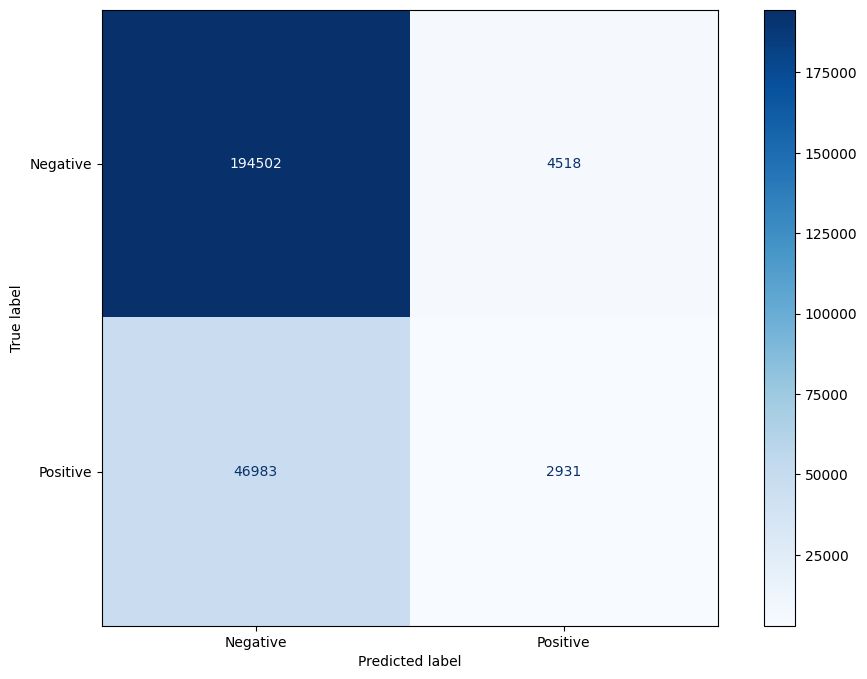

In [ ]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, log_reg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Negative', 'Positive'])
disp = disp.plot(cmap="Blues")
plt.show()
#ConfusionMatrixDisplay(modelo, X_test, y_test, display_labels=['Negative', 'Positive'])

# Agregado para Practica integradora

En el caso de la regresión logística:

La precisión en los datos de entrenamiento es del 79.31% y en los datos de prueba es del 79.00%. La diferencia entre estos dos valores no es muy grande, lo que sugiere que el modelo no está sobreajustado.
Sin embargo, la precisión general es relativamente baja, lo que podría sugerir que el modelo está subajustado y necesita ser más complejo o requiere mejores características para capturar los patrones en los datos.
Para el Random Forest Classifier:

La precisión en los datos de entrenamiento es del 81.36% y en los datos de prueba es del 81.00%. Al igual que en el caso anterior, la diferencia no es significativa, lo que sugiere que el modelo no está sobreajustado.
La precisión general es más alta que la de la regresión logística, lo que indica que este modelo está mejorando la generalización y es menos probable que esté subajustado.
En resumen, los resultados sugieren que ambos modelos tienen un rendimiento similar en los datos de entrenamiento y prueba, lo que indica que no están sobreajustados. Sin embargo, la precisión general podría ser mejor, lo que sugiere que hay margen para mejorar la generalización del modelo. Es posible que desees considerar la exploración de más características, la optimización de hiperparámetros o la experimentación con diferentes algoritmos para mejorar el rendimiento general del modelo